In [124]:
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt,sklearn

In [125]:
data=pd.read_csv("./DataSets/lending_club_loan_two.csv")
pd.set_option('display.max_columns', None)
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [126]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## EXPLORATORY DATA ANALYSIS

#### GOAL:UNDERSTAND WHICH VARIABLES ARE IMPORTANT AND WHICH ARE NOT

<AxesSubplot:xlabel='loan_status', ylabel='count'>

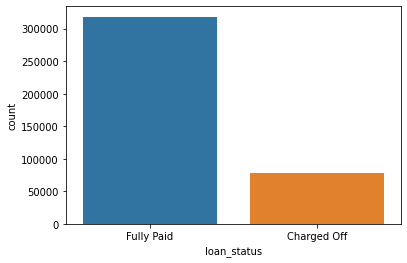

In [128]:
# COMPARING PEOPLE WHO FULLY PAID VS CHARGED-OFF
sns.countplot(x='loan_status',data=data)

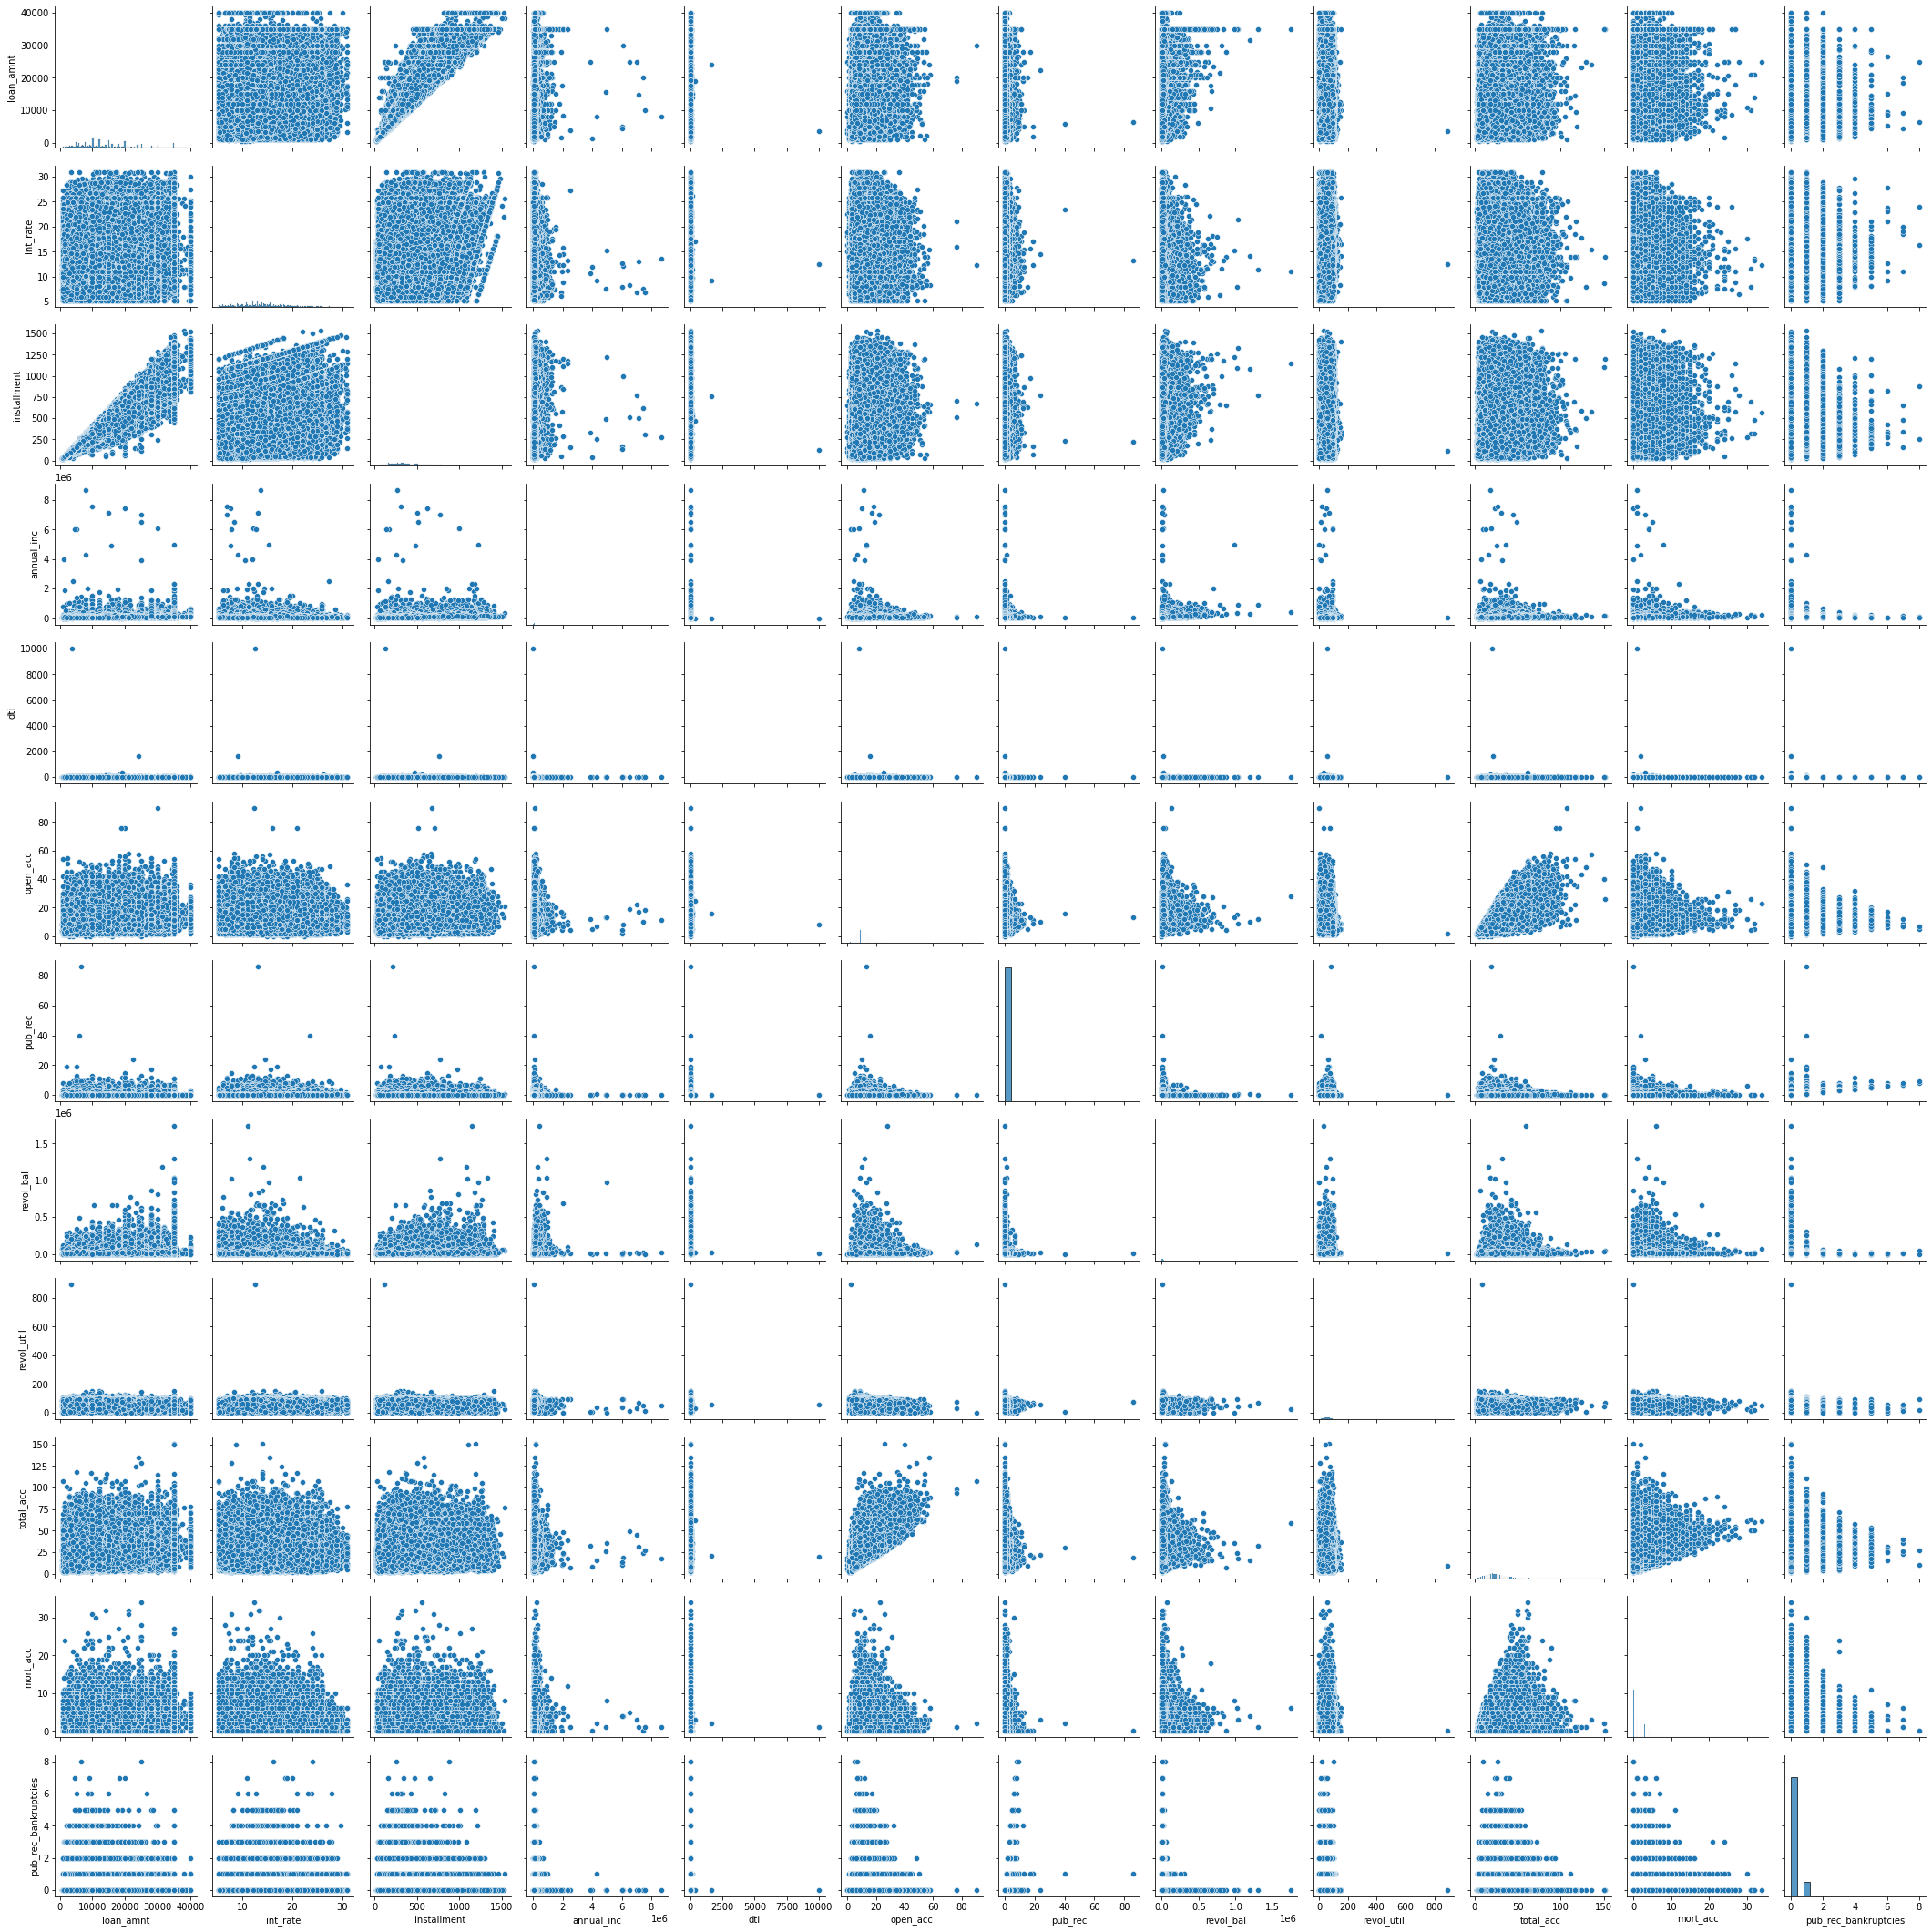

In [129]:
sns.pairplot(data=data)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

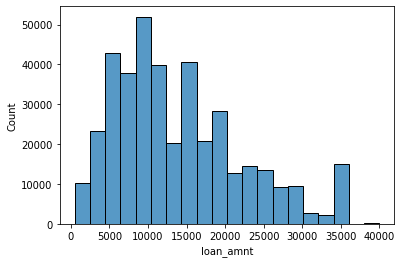

In [130]:
sns.histplot(x='loan_amnt',data=data,bins=20)

In [131]:
# TRYING TO FIND A CORRELATION BETWEEN VARIABES
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

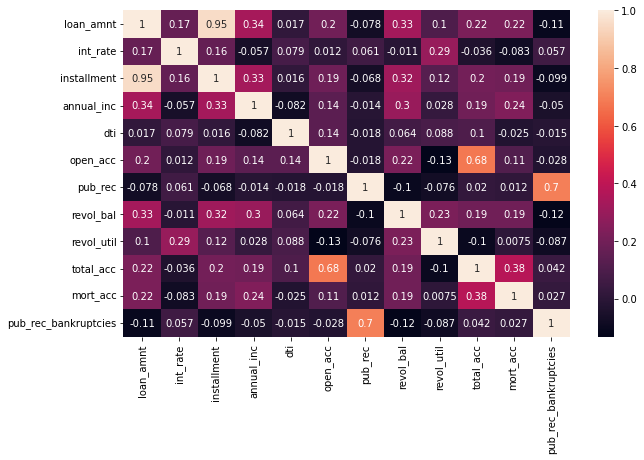

In [132]:
# VISUALIZING THE CORRELATIONS
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),xticklabels=True,yticklabels=True,annot=True)

In [133]:
# TRYING TO GET THE BEST DEPENDENCY VARIABLE FOR 'loan_amnt' FEATURE
data_corr=data.corr()['loan_amnt'].sort_values(ascending=False)
data_corr

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

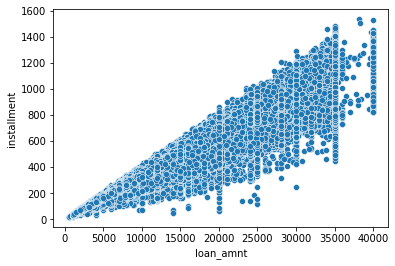

In [134]:
## ACCORDING TO THE CORRELATION VALUES THE BEST DEPENDENCY FEATURE FOR 'loan_amnt' IS THE 'installment'
sns.scatterplot(x='loan_amnt',y='installment',data=data)

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

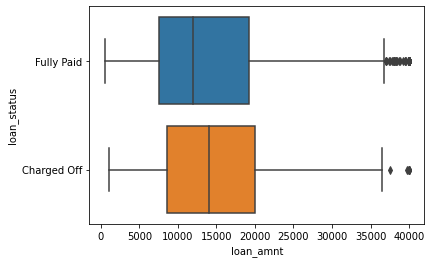

In [135]:
# PLOTTING THE REALTION BETWEEN LOAN_AMNT AND LOAN_STATUS
sns.boxplot(x='loan_amnt',y='loan_status',data=data)

In [136]:
data_loan_status=data.groupby('loan_status')
data_loan_status.describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate                                    \
                 75%      max     count       mean       std   min    25%   
loan_status                                                                 
Charged Off  20000.0  40000.0   77673.0  15.882587  4.388135  5.32  12.99   
Fully Paid   19225.0  40000.0  318357.0  13.092105  4.319105  5.32   9.91   

                                 installment                                 \
               50%    75%    max       count        mean         std    min   
loan_status                                                                   
Charged Off  15.61  18.64  30.99     77673.0  452.703110  249.096609  21.62   
Fully Paid   12.99  15.61  30.99    318357.0  426.761866  250.861622  16.08   

                                             annual_inc                \
                25%     50%     75%      max      count          mean   
loan_status                                                             
Charged Off  274.86  399.06  585.67  1527.00    77673.0  67535.537710   
Fully Paid   244.46  369.51  562.89  1533.81   318357.0  75829.951566   

                                                                         \
                      std    min       25%      50%      75%        max   
loan_status                                                               
Charged Off  58303.457136    0.0  42000.00  59000.0  80000.0  8706582.0   
Fully Paid   62315.991907  600.0  46050.53  65000.0  90000.0  7600000.0   

                  dti                                                          \
                count       mean        std  min    25%    50%    75%     max   
loan_status                                                                     
Charged Off   77673.0  19.656346  36.781068  0.0  13.33  19.34  25.55  9999.0   
Fully Paid   318357.0  16.824010   8.500979  0.0  10.87  16.34  22.29  1622.0   

             open_acc                                                   \
                count       mean       std  min  25%   50%   75%   max   
loan_status                                                              
Charged Off   77673.0  11.602513  5.288507  0.0  8.0  11.0  14.0  76.0   
Fully Paid   318357.0  11.240067  5.097647  0.0  8.0  10.0  14.0  90.0   

              pub_rec                                               revol_bal  \
                count      mean       std  min  25%  50%  75%   max     count   
loan_status                                                                     
Charged Off   77673.0  0.199606  0.648283  0.0  0.0  0.0  0.0  86.0   77673.0   
Fully Paid   318357.0  0.172966  0.497637  0.0  0.0  0.0  0.0  24.0  318357.0   

                                                                        \
                     mean           std  min     25%      50%      75%   
loan_status                                                              
Charged Off  15390.454701  18203.387930  0.0  6150.0  11277.0  19485.0   
Fully Paid   15955.327918  21132.193457  0.0  5992.0  11158.0  19657.0   

                       revol_util                                         \
                   max      count       mean        std  min   25%   50%   
loan_status                                                                
Charged Off  1030826.0    77610.0  57.869824  23.492176  0.0  41.2  59.3   
Fully Paid   1743266.0   318144.0  52.796918  24.578304  0.0  34.6  53.7   

                         total_acc                                         \
              75%    max     count       mean        std  min   25%   50%   
loan_status  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

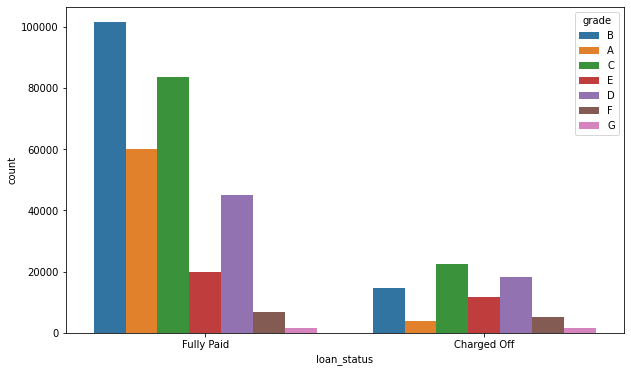

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status',hue='grade',data=data)

<AxesSubplot:xlabel='grade', ylabel='count'>

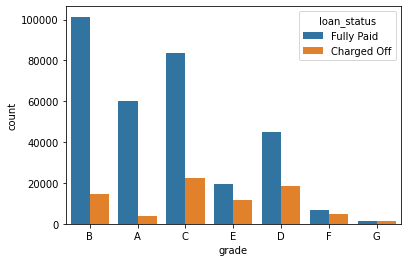

In [138]:
sns.countplot(x='grade',hue='loan_status',data=data)

In [139]:
data['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [140]:
emp_length_srtd=[
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

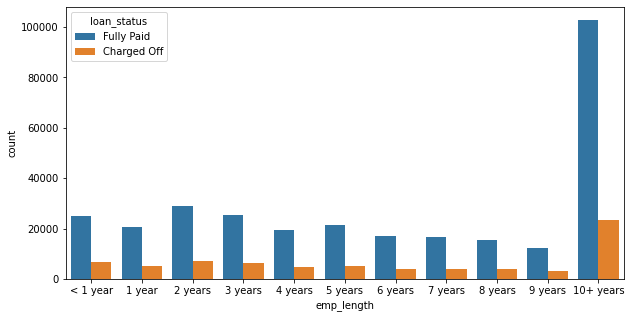

In [141]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=data,order=emp_length_srtd,hue='loan_status')

### FEATURE ENGINEERING AND DATA PREPROCESSING

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [143]:
# CONVERTING CATEGORICAL FEATURE 'loan_status' TO A NUMERIC FEATURE
loan_repaid=pd.get_dummies(data=data['loan_status'],drop_first=True)
loan_repaid['loan_status']=loan_repaid['Fully Paid']
loan_repaid.drop('Fully Paid',inplace=True,axis=1)

In [144]:
#APPENDING THE NUMERIC FEATURE EXTRACTED
data.drop('loan_status',axis=1,inplace=True)
data['loan_status']=loan_repaid
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [145]:
# EXTRACTING ZIP CODE FROM ADDRESS AND APPENDING THEM TO THE MAIN DATA
data['zip_code']=data['address'].apply(lambda x:x[-5:])
zips=pd.get_dummies(data=data['zip_code'],drop_first=True)
data.drop('zip_code',axis=1,inplace=True)
data=pd.concat([data,zips],axis=1)

In [146]:
data.drop('address',axis=1,inplace=True)

In [147]:
#ENCODING THE SUBGRADE COLUMN
subgrade=pd.get_dummies(data['sub_grade'],drop_first=True)
data=pd.concat([data,subgrade],axis=1)
data.drop('sub_grade',axis=1,inplace=True)
data

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36 months,11.44,329.48,B,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36 months,11.99,265.68,B,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36 months,6.49,220.65,A,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60 months,17.27,609.33,C,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36 months,12.29,700.42,C,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36 months,9.99,161.32,B,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60 months,15.31,503.02,C,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
# EXTRACTING YEAR FROM EARLIEST 'earliest_cr_line' AND CONCATINATING WITH THE ORIGINAL DATA
# year=data['earliest_cr_line'].apply(lambda x:x[-4:])
data['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [149]:
## CONVERTING CATEGORICAL 'purpose' VARIABLE TO NUMERICAL
purpose=pd.get_dummies(data['purpose'],drop_first=True)
data=pd.concat([data,purpose],axis=1)
data.drop('purpose',axis=1,inplace=True)
data

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36 months,11.44,329.48,B,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36 months,11.99,265.68,B,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36 months,6.49,220.65,A,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60 months,17.27,609.33,C,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36 months,12.29,700.42,C,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36 months,9.99,161.32,B,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60 months,15.31,503.02,C,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [150]:
# EXTRACTING THE MONTH FROM THE TERM
term=data['term'].apply(lambda x:x[:3])
data.drop('term',axis=1,inplace=True)
data=pd.concat([data,term],axis=1)
data

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,term
0,10000.0,11.44,329.48,B,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36
1,8000.0,11.99,265.68,B,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36
2,15600.0,10.49,506.97,B,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36
3,7200.0,6.49,220.65,A,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36
4,24375.0,17.27,609.33,C,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,B,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60
396026,21000.0,12.29,700.42,C,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36
396027,5000.0,9.99,161.32,B,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36
396028,21000.0,15.31,503.02,C,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60


In [151]:
# INITIAL_LIST_STATUS CAN BE CONVERTED AS:
# w-->1
# f-->0
initial_list_status=pd.get_dummies(data['initial_list_status'],drop_first=True)
initial_list_status.rename(columns={'w':'initial_list_status'},inplace=True)
data.drop('initial_list_status',axis=1,inplace=True)
data=pd.concat([data,initial_list_status],axis=1)
data

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,term,initial_list_status
0,10000.0,11.44,329.48,B,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36,1
1,8000.0,11.99,265.68,B,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0
2,15600.0,10.49,506.97,B,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0
3,7200.0,6.49,220.65,A,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0
4,24375.0,17.27,609.33,C,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,B,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,1
396026,21000.0,12.29,700.42,C,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,INDIVIDUAL,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0
396027,5000.0,9.99,161.32,B,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0
396028,21000.0,15.31,503.02,C,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,INDIVIDUAL,5.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,0


In [152]:
## VERIFICATION STATUS
verification_status=pd.get_dummies(data['verification_status'],drop_first=True)
data.drop('verification_status',inplace=True,axis=1)
data=pd.concat([data,verification_status],axis=1)
data

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,term,initial_list_status,Source Verified,Verified
0,10000.0,11.44,329.48,B,Marketing,10+ years,RENT,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36,1,0,0
1,8000.0,11.99,265.68,B,Credit analyst,4 years,MORTGAGE,65000.0,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0
2,15600.0,10.49,506.97,B,Statistician,< 1 year,RENT,43057.0,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,1,0
3,7200.0,6.49,220.65,A,Client Advocate,6 years,RENT,54000.0,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0
4,24375.0,17.27,609.33,C,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,B,licensed bankere,2 years,RENT,40000.0,Oct-2015,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,1,1,0
396026,21000.0,12.29,700.42,C,Agent,5 years,MORTGAGE,110000.0,Feb-2015,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,INDIVIDUAL,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,1,0
396027,5000.0,9.99,161.32,B,City Carrier,10+ years,RENT,56500.0,Oct-2013,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,0,1
396028,21000.0,15.31,503.02,C,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Aug-2012,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,INDIVIDUAL,5.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,0,0,1


In [153]:
# HOME OWNERSHIP
home_ownership=pd.get_dummies(data['home_ownership'],drop_first=True)
data.drop('home_ownership',inplace=True,axis=1)
data=pd.concat([data,home_ownership],axis=1)
data

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,term,initial_list_status,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT
0,10000.0,11.44,329.48,B,Marketing,10+ years,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36,1,0,0,0,0,0,0,1
1,8000.0,11.99,265.68,B,Credit analyst,4 years,65000.0,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,1,0,0,0,0
2,15600.0,10.49,506.97,B,Statistician,< 1 year,43057.0,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,1,0,0,0,0,0,1
3,7200.0,6.49,220.65,A,Client Advocate,6 years,54000.0,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,1
4,24375.0,17.27,609.33,C,Destiny Management Inc.,9 years,55000.0,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,B,licensed bankere,2 years,40000.0,Oct-2015,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,1,1,0,0,0,0,0,1
396026,21000.0,12.29,700.42,C,Agent,5 years,110000.0,Feb-2015,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,INDIVIDUAL,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,1,0,1,0,0,0,0
396027,5000.0,9.99,161.32,B,City Carrier,10+ years,56500.0,Oct-2013,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,INDIVIDUAL,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,0,1,0,0,0,0,1
396028,21000.0,15.31,503.02,C,"Gracon Services, Inc",10+ years,64000.0,Aug-2012,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,INDIVIDUAL,5.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,0,0,1,1,0,0,0,0


In [154]:
appl_type=pd.get_dummies(data['application_type'],drop_first=True)
data=pd.concat([data,appl_type],axis=1)
data.drop('application_type',axis=1,inplace=True)
data.head()

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,term,initial_list_status,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT,INDIVIDUAL,JOINT
0,10000.0,11.44,329.48,B,Marketing,10+ years,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36,1,0,0,0,0,0,0,1,1,0
1,8000.0,11.99,265.68,B,Credit analyst,4 years,65000.0,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,1,0,0,0,0,1,0
2,15600.0,10.49,506.97,B,Statistician,< 1 year,43057.0,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,1,0,0,0,0,0,1,1,0
3,7200.0,6.49,220.65,A,Client Advocate,6 years,54000.0,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,1,1,0
4,24375.0,17.27,609.33,C,Destiny Management Inc.,9 years,55000.0,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,1,1,0,0,0,0,1,0


### GETTING RID OF UNNECESSARY VARIABLE COLUMNS

In [155]:
data['emp_title'].isnull().sum()
data['emp_title'].nunique()
## THE EMP_TITLE HAS A 173105 UNIQUE VALUES AND 22927 NULL VALUES SO IT'S HARD TO FILL THESE NULL VALUES WITH AN EXISTING VALUE 
## SO WE TRY TO REMOVE THIS COLUMN
data.drop('emp_title',axis=1,inplace=True)

In [156]:
##THE COLUMN emp_length HAS MERELY NUERICAL ELEMENTS WHICH IS HARD TO ENCODE SO WE CAN DROP IT
data.drop('emp_length',axis=1,inplace=True)

In [157]:
data['title'].nunique() ##THE TITLE COLUMN HAS 48817 UNIQUE VALUES,WHICH IS MOSTLY TEXT. SO WE COULD DROP IT
data.drop('title',axis=1,inplace=True)

In [158]:
## AS THE GRADE IS PART OF SUB_GRADE WE CAN ACTUALLY DROP IT
data=data.drop('grade',axis=1)

In [159]:
##THE ISSUE DATE COLUMN DOESN'T INCORPORATE ANY GOOD TO OUR MODEL'S PREDICTION SO WE CAN REMOVE IT
data=data.drop('issue_d',axis=1)

### HANDLING MISSING VALUES

In [160]:
data.isnull().sum()

loan_amnt      0
int_rate       0
installment    0
annual_inc     0
dti            0
              ..
OTHER          0
OWN            0
RENT           0
INDIVIDUAL     0
JOINT          0
Length: 81, dtype: int64

In [161]:
## PERCENTAGE NULL VALUES IN EACH COLUMN
((data.isnull().sum())/len(data))*100

loan_amnt      0.0
int_rate       0.0
installment    0.0
annual_inc     0.0
dti            0.0
              ... 
OTHER          0.0
OWN            0.0
RENT           0.0
INDIVIDUAL     0.0
JOINT          0.0
Length: 81, dtype: float64

In [162]:
## MORTAGAGE ACCOUNT HAS ABOUT 9.5% OF NULL VALUES SO WE WILL REPALCE THIS WITH THE NEAREST CORRELATED FEATURE
mort_acc=data.corr()['mort_acc'].sort_values(ascending=False)
mort_acc

mort_acc      1.000000
MORTGAGE      0.476730
total_acc     0.381072
annual_inc    0.236320
loan_amnt     0.222315
                ...   
moving       -0.031868
other        -0.033752
OWN          -0.065227
int_rate     -0.082583
RENT         -0.447957
Name: mort_acc, Length: 79, dtype: float64

In [163]:
## total_acc HAS NEAREST CORRELATION WITH THE mort_acc
total_acc_avg=data.groupby('total_acc').mean()['mort_acc']

In [164]:
def replace(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [165]:
data['mort_acc']=data.apply(lambda x:replace(x['total_acc'],x['mort_acc']),axis=1)

In [166]:
data.isnull().sum()

loan_amnt      0
int_rate       0
installment    0
annual_inc     0
dti            0
              ..
OTHER          0
OWN            0
RENT           0
INDIVIDUAL     0
JOINT          0
Length: 81, dtype: int64

In [167]:
##FOR THE revol_util AND pub_rec_bankruptcies COMPARED TO THE SIZE OF THE DATASET THESE ARE MERELY LESS SO WE WILL DROP THE NULL'S
data=data.dropna()
data.isnull().sum()

loan_amnt      0
int_rate       0
installment    0
annual_inc     0
dti            0
              ..
OTHER          0
OWN            0
RENT           0
INDIVIDUAL     0
JOINT          0
Length: 81, dtype: int64

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   int_rate              395219 non-null  float64
 2   installment           395219 non-null  float64
 3   annual_inc            395219 non-null  float64
 4   dti                   395219 non-null  float64
 5   earliest_cr_line      395219 non-null  object 
 6   open_acc              395219 non-null  float64
 7   pub_rec               395219 non-null  float64
 8   revol_bal             395219 non-null  float64
 9   revol_util            395219 non-null  float64
 10  total_acc             395219 non-null  float64
 11  mort_acc              395219 non-null  float64
 12  pub_rec_bankruptcies  395219 non-null  float64
 13  loan_status           395219 non-null  uint8  
 14  05113                 395219 non-null  uint8  
 15  

In [169]:
def replace_ercr(ercr):
    year=ercr[-4:]
    return int(year)
def replace_term(term):
    return int(term)

In [170]:
## CONVERTING OBJECT TYPE 'term' TO AN INTEGER
data['term']=data['term'].apply(lambda x:replace_term(x))
data.head()

,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status,05113,11650,22690,29597,30723,48052,70466,86630,93700,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,term,initial_list_status,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT,INDIVIDUAL,JOINT
0,10000.0,11.44,329.48,117000.0,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36,1,0,0,0,0,0,0,1,1,0
1,8000.0,11.99,265.68,65000.0,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,1,0,0,0,0,1,0
2,15600.0,10.49,506.97,43057.0,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,1,0,0,0,0,0,1,1,0
3,7200.0,6.49,220.65,54000.0,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,1,1,0
4,24375.0,17.27,609.33,55000.0,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,1,1,0,0,0,0,1,0


In [171]:
## CONVERTING OBJECT TYPE 'earliest_cr_line' TO AN INTEGER
data['earliest_cr_line']=data['earliest_cr_line'].apply(lambda x:replace_ercr(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   int_rate              395219 non-null  float64
 2   installment           395219 non-null  float64
 3   annual_inc            395219 non-null  float64
 4   dti                   395219 non-null  float64
 5   earliest_cr_line      395219 non-null  int64  
 6   open_acc              395219 non-null  float64
 7   pub_rec               395219 non-null  float64
 8   revol_bal             395219 non-null  float64
 9   revol_util            395219 non-null  float64
 10  total_acc             395219 non-null  float64
 11  mort_acc              395219 non-null  float64
 12  pub_rec_bankruptcies  395219 non-null  float64
 13  loan_status           395219 non-null  uint8  
 14  05113                 395219 non-null  uint8  
 15  

## SET X AND y VARIABLES

In [172]:
X=data.drop('loan_status',axis=1).values
y=data['loan_status'].values

## TRAIN TEST SPLIT

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## NORMALIZING THE DATA USING MIN_MAX SCALER

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## CREATING A DEEP LEARNING MODEL

In [175]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [176]:
model=Sequential()
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [177]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.2982 - val_loss: 0.2661
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2650 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2627 - val_loss: 0.2621
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2617 - val_loss: 0.2629
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2609 - val_loss: 0.2617
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2602 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2597 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2593 - val_loss: 0.2623
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.259

## EVALUATING THE MODEL

In [178]:
from sklearn.metrics import classification_report,confusion_matrix

In [179]:
losses=pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.298180,0.266141
1,0.264968,0.262871
2,0.262692,0.262097
3,0.261737,0.262927
4,0.260902,0.261683
5,0.260185,0.261498
6,0.260013,0.261433
7,0.259687,0.261330
8,0.259286,0.262314
9,0.259154,0.261272


In [180]:
predictions=model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss

In [ ]:
losses=[]
for i in range(0,len(predictions)):
    loss=mae_loss(predictions[i],y_test[i])
    losses.append(loss)

In [ ]:
sns.histplot(losses,bins=30)

## WE CAN OBSERVE THAT THE LOSS IS HIGH AT THE BEGINNING AND DUE TO THE MODEL'S  BACKPROPOGATION THE LOSS GETS MINIMIZED